In [ ]:

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [ ]:
from utils import *

In [ ]:
SEED = 8

In [ ]:
INPUT_FILE = "concrete.csv"
INPUT_DIR = "./"

In [ ]:

df = read_input(INPUT_DIR, INPUT_FILE)


In [ ]:
df.shape

In [ ]:
df.head()

## EDA

### 1. Univariate analysis *(10 Marks)*

#### Checking data type is consistent

In [9]:
sanity_df = sanity_check_1(df)

In [10]:
sanity_df

,dtype,null,unique,null_%
cement,float64,0,278,0.0
slag,float64,0,185,0.0
ash,float64,0,156,0.0
water,float64,0,195,0.0
superplastic,float64,0,111,0.0
coarseagg,float64,0,284,0.0
fineagg,float64,0,302,0.0
age,int64,0,14,0.0
strength,float64,0,845,0.0


#### Check for duplicte rows

In [11]:

df.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [12]:

duplicate_rows = df.duplicated().sum()


In [13]:
duplicate_rows

25

-- churn_model


* customer_1: 12, 25, 1
* customer_1: 12, 25, 1
* customer_2: 12, 25, 1
    
    
* Will change distribution

In [ ]:

df.drop(columns=['strength']).duplicated().sum()


In [14]:
print(f"Duplicate rows in the data: {duplicate_rows}")

Duplicate rows in the data: 25


#### Sanity check of individual columns

In [15]:
univariate_df = univariate_numerical(df)

In [16]:
univariate_df.T

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
10%,153.550000,0.000000,0.000000,154.600000,0.000000,852.100000,664.070000,3.000000,14.200000
20%,173.800000,0.000000,0.000000,162.000000,0.000000,913.980000,709.940000,7.000000,20.960000
30%,212.380000,0.000000,0.000000,170.000000,0.000000,936.000000,746.800000,14.000000,25.474000
40%,238.000000,0.000000,0.000000,178.000000,4.060000,947.000000,758.840000,28.000000,30.928000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
60%,302.000000,97.100000,89.760000,188.500000,8.000000,991.520000,794.080000,28.000000,39.020000


`Slag, Ash and Superplastcizer can be zero. As Cement, water, coarseagg and fineagg are the important constituents of cement.`

`Age should not be zero.`

`Concrete starts developing strength after 24 hours, its gain approx 15% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1.`

`Age is highly skewed`

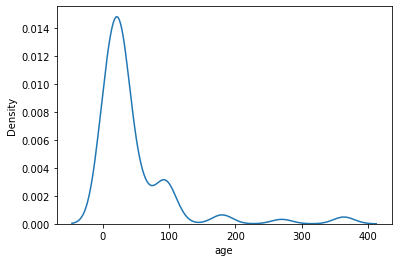

In [17]:
# To see skewness of age
sns.distplot(df['age'],
             hist = False)
plt.show()

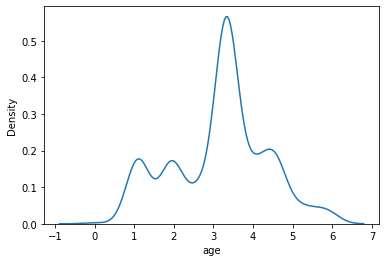

In [18]:
# Skewness of Age after log transformation

sns.distplot(np.log(df['age']),hist=False)
plt.show()

# log transformation to reduce skewness

In [19]:

np.log(df['age']).skew()


-0.15135107046754767

In [ ]:
df['b'] = np.log(df['age'])

In [ ]:
df.corr()

In [ ]:
del df['b']

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:

X = df[['age']]
Y = df['strength']
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)


0.10815745064203353

In [22]:
df['age'] = np.log(df['age'].values)
X = df[['age']]
Y = df['strength']
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.30490317863463867

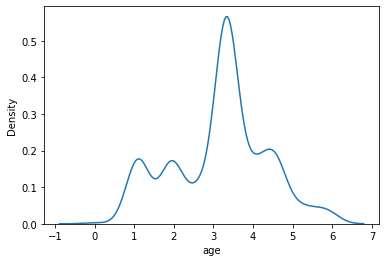

In [23]:
# To see skewness of age
sns.distplot(df['age'],
             hist = False)
plt.show()

### 2. Bi-variate analysis *(10 marks)*

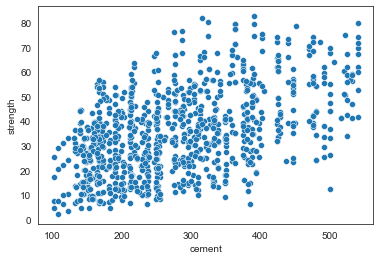

In [25]:

sns.scatterplot(x='cement',
               y='strength',
               data=df)
plt.show()


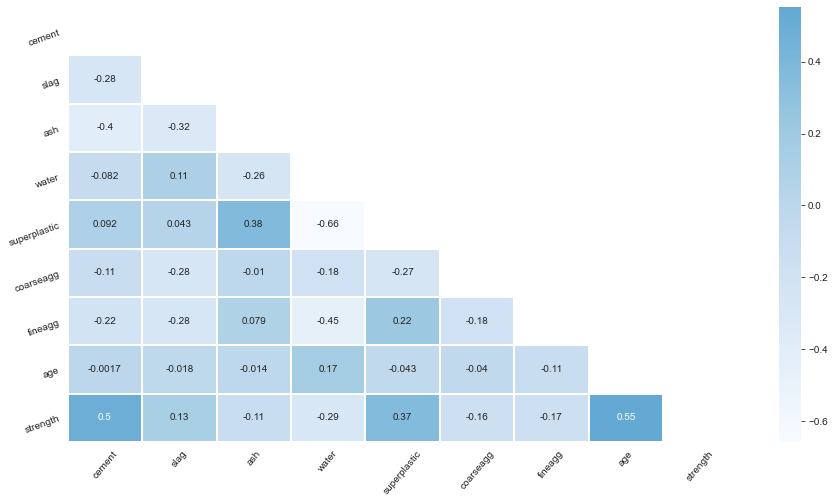

In [24]:

corr = (df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle,
            center=0.5,
            cmap= 'Blues',
            annot= True,
            xticklabels = corr.index,
            yticklabels = corr.columns,
            cbar= True,
            linewidths= 1,
            mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()


`As age is increasing strength is increasing`

`Cement and strength have a linear relationship`

`"age", "cement" have the highest correlation with the target`

### 3. Feature Engineering techniques (10 marks)

In [ ]:
df.head()

In [27]:

nan_to_num = lambda x: np.nan_to_num(x, posinf=0, neginf=0)


In [28]:

df['r_water_cement'] = nan_to_num(df['water'].values / df['cement'].values)
df['r_coarseagg_fineagg'] = nan_to_num(df['coarseagg'].values / df['fineagg'].values) # Extracting a new column
df['r_slag_cement'] = nan_to_num(df['slag'].values/df['cement'].values)
df['p_ash_water'] = nan_to_num(df['ash'].values*df['water'].values)


df['agg_flag'] = df[['slag','ash','superplastic']].max(axis=1)

df['agg_flag'] = df['agg_flag'] > 0

df['slag_flag'] = df['slag'] > 0
df['ash_flag'] = df['ash'] > 0
df['superplastic_flag'] = df['superplastic'] > 0


In [30]:

features = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age','strength']

new_features = ['r_water_cement', 'r_coarseagg_fineagg', 'r_slag_cement',
         'p_ash_water','slag_flag','ash_flag','superplastic_flag','agg_flag']


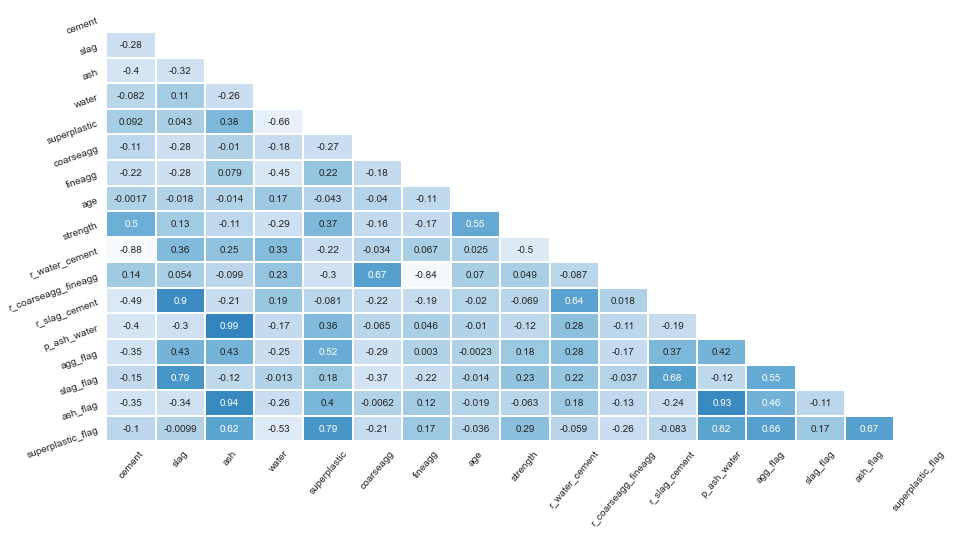

In [31]:
corr = (df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [32]:
df.to_csv("concrete_wd_features.csv",
         index=False)